# 라이브러리

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objs as go
import plotly.offline as py

In [22]:
pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 21.1 MB/s eta 0:00:00m eta 0:00:010:01:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.3.0 requires numpydoc>=1.4.0, which is not installed.
pdpbox 0.3.0 requires pytest, which is not installed.
pdpbox 0.3.0 requires sphinx>=5.0.2, which is not installed.
Note: you may need to restart the kernel to use updated packages.


# 데이터 탐색

## 데이터 기본 탐색

In [14]:
train = pd.read_csv('train.csv', parse_dates = ['date'])
train

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0
...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,NaN,3,0
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,NaN,3,0
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,NaN,6,0
3362794,1799,2018-07-25,18:09:13,57932602d6,300,NaN,2,0


In [15]:
train.shape

(3362796, 8)

### 정리
- store_id :각 파일에서의 상점 고유 번호.
- date : 거래 일자
- time :거래 시간
- card_id :카드 번호의 hash 값
- amount :매출액
- installments : 할부개월수. 일시불은 빈 문자열
- days_of_week : 요일, 월요일이 0, 일요일은 6
- holiday : 1이면 공휴일, 0이면 공휴일이 아님

## 결측치 제거 및 유니크 확인

In [16]:
train.isnull().sum()

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64

In [17]:
train['installments'] = train['installments'].fillna(1)
# 할부 개월 컬럼 공란 = 일시불 = 1로 채움

In [18]:
train.isnull().sum()

store_id        0
date            0
time            0
card_id         0
amount          0
installments    0
days_of_week    0
holyday         0
dtype: int64

In [19]:
train.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,1.0,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,1.0,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,1.0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1.0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,1.0,0,0


In [32]:
train.columns.values
train.columns

Index(['store_id', 'date', 'time', 'card_id', 'amount', 'installments',
       'days_of_week', 'holyday'],
      dtype='object')

In [40]:
len(train['installments'].unique())

17

In [38]:
train_unique = []
for col in train.columns.values:
    train_unique.append(len(train[col].unique()))

unique_train = pd.DataFrame({'column': train.columns,
                            'unique_count': train_unique})

unique_train

,column,unique_count
0,store_id,1775
1,date,730
2,time,85924
3,card_id,922522
4,amount,6031
5,installments,17
6,days_of_week,7
7,holyday,2


## 시간에 따른 탐색

In [42]:
###요일변수 
train['date'] = pd.to_datetime(train['date'])
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day

train['hour'] = train['time'].apply(lambda x: x[0:2])
train['hour'] = train['hour'].astype('int')

train['weekend'] = train['days_of_week'].apply(lambda x: 1 if x > 4 else 0)
# 주말 1, 평일 0
train

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,year,month,day,hour,weekend
0,0,2016-12-14,18:05:31,d297bba73f,5,1.0,2,0,2016,12,14,18,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,1.0,2,0,2016,12,14,18,0
2,0,2016-12-19,12:42:31,0880849c05,144,1.0,0,0,2016,12,19,12,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1.0,0,0,2016,12,19,12,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,1.0,0,0,2016,12,19,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,1.0,3,0,2018,7,19,17,0
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,1.0,3,0,2018,7,19,18,0
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,1.0,6,0,2018,7,22,14,1
3362794,1799,2018-07-25,18:09:13,57932602d6,300,1.0,2,0,2018,7,25,18,0


## 일별 store id의 구매 건수

In [45]:
day_store_id = train.groupby(['date'])['store_id'].size()

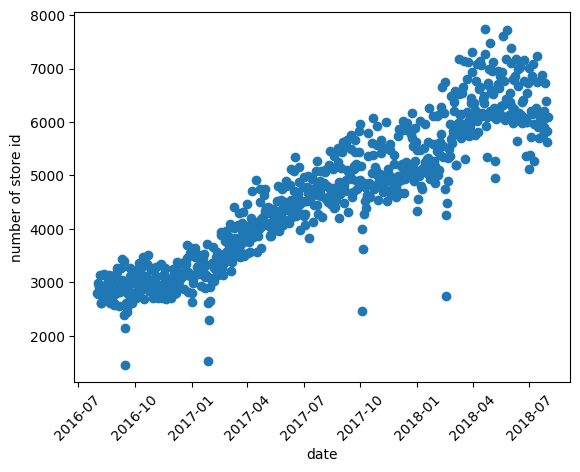

In [48]:
plt.scatter(day_store_id.index, day_store_id.values)
plt.xlabel('date')
plt.ylabel('number of store id')
plt.xticks(rotation=45)
plt.show()

In [54]:
day_store_id.sort_index(ascending = True).sort_values(ascending = True).head(50)

date
2016-09-15    1452
2017-01-28    1525
2016-09-16    2144
2017-01-29    2290
2016-09-14    2383
2016-09-18    2440
2017-10-04    2465
2016-09-19    2523
2016-09-05    2564
2016-08-29    2569
2016-09-17    2609
2016-08-07    2609
2016-09-26    2616
2016-08-22    2617
2016-08-28    2620
2016-08-08    2622
2017-01-27    2624
2017-01-01    2634
2017-01-30    2644
2016-11-21    2681
2016-10-16    2699
2016-09-27    2703
2016-10-03    2703
2016-11-07    2706
2016-10-31    2712
2016-11-28    2713
2016-11-14    2715
2016-11-01    2725
2016-08-21    2728
2016-08-15    2742
2018-02-16    2752
2016-08-09    2767
2016-09-20    2775
2016-11-29    2777
2016-10-02    2778
2016-08-30    2785
2016-12-04    2789
2016-08-02    2792
2017-01-02    2793
2016-09-25    2798
2016-12-05    2799
2016-11-23    2800
2016-08-31    2803
2016-08-01    2808
2016-12-06    2809
2016-11-02    2812
2016-12-26    2822
2016-08-25    2826
2016-09-07    2826
2016-11-24    2827
Name: store_id, dtype: int64